In [ ]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

In [ ]:
def newton_simpson (a:float , b:float, n:int, count:int):
  width = float((b - a) / n)
  x_1 = float(0)
  x_2 = float(0)
  sum_1 = float(0)
  sum_2 = float(0)
  integral_simpson = float(0)

  for i in range (1, n + 1):
    x_1 = a + i * width
    x_2 = a + (i - 1) * width

    if (i <= n - 1):
      sum_1 += simp_equation(x_1, count)

    sum_2 += simp_equation((x_1 + x_2) / 2, count)
  integral_simpson = width / 3.0 * (1.0 / 2.0 * simp_equation(a, count) + sum_1 + 2.0 * sum_2 + 1.0 / 2.0 * simp_equation(b, count))
  return integral_simpson

In [ ]:
def simp_equation (x:float, count:int):
  simp = B(count) * m.pow((1 + m.pow(x, 2)/ count), -(count + 1) / 2)
  return simp

In [ ]:
def B (count:int):
  b_value = 1 / (2 * m.sqrt(count)) * dfact((2 * count - 1)) / dfact((2 * count))
  return b_value

In [ ]:
dfact = lambda n: (n <= 0) or n * dfact(n-2)

In [ ]:
def x_true (x:float, x_exception:int):
  result = float(0)
  for i in range(0, len(x)):
    if (i != x_exception):
      result += x[i]
  result = result / (len(x) - 1)
  return result

In [ ]:
def empirical_standard (x:float, x_true:float):
  result = float(0)
  for i in range(0, len(x)):
    result += m.pow(x[i] - x_true, 2)
  result = result / (len(x) - 1)
  result = m.sqrt(result)
  return result

In [ ]:
def random_value (x:float, x_true:float, empirical_standard:float):
  result = np.absolute(x_true - x) / empirical_standard
  return result

In [ ]:
def S (t:float, count:int):
  S = newton_simpson(0, t, 1000, count)
  return S

In [ ]:
alpha = float(input("Введите значение α: "))
n = 0

Введите значение α: 0.01


Ошибка: 3.8


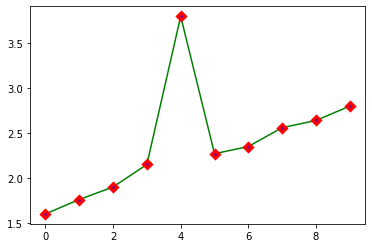

In [ ]:
x = np.array([1.60, 1.76, 1.90, 2.15, 3.80, 2.27, 2.35, 2.56, 2.64, 2.80 ])
failure_chance = np.array([])
fail = float(0)
I_value = float(0) 
for i in range(0, len(x)):
  x_p = x_true(x, i)
  t = random_value(x[i], x_p, empirical_standard(x, x_p))
  check_chance = S(t, len(x))
  if (check_chance < alpha):
    failure_chance = np.append(failure_chance, 1 - alpha)
  else:
    failure_chance = np.append(failure_chance, 0)
for i in range(0, len(failure_chance)):
  if (failure_chance[i] > fail):
    fail = failure_chance[i]
    I_value = i
print("Ошибка:", x[I_value - 1])
plot_x = np.array([])
plot_y = np.array([])
fig, ax = plt.subplots()
for i in range(0, len(x)):
  plot_x = np.append(plot_x, i)
  plot_y = np.append(plot_y, x[i])
ax.plot(plot_x, plot_y,
        marker = 'D',
        markersize = 5,
        color = 'green',
        markerfacecolor = 'purple',
        markeredgecolor = 'red',
        markeredgewidth = 3)